<a href="https://colab.research.google.com/github/JakubDemeszko/ML_Course/blob/main/ML/sci_kit07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set()
np.random.seed(10)

In [38]:
# Przygotowanie danych, ustawienie danych jako data i targetu jako klasy
iris = load_iris()
data = iris.data
targets = iris.target
feature_names = [name.replace(' ', '_')[:5] for name in iris.feature_names]
class_names = iris.target_names

print(f'Liczba próbek: {len(data)}')
print(f'Nazwy zmiennych objaśniających {feature_names}')
print(f'Nazwy kategorii / klas: {class_names}')

Liczba próbek: 150
Nazwy zmiennych objaśniających ['sepal', 'sepal', 'petal', 'petal']
Nazwy kategorii / klas: ['setosa' 'versicolor' 'virginica']


In [39]:
# Tworzenie DF
data_targets = np.c_[data, targets]
df = pd.DataFrame(data_targets, columns = feature_names + ['class'])
df.head()

,sepal,sepal,petal,petal,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [40]:
# Przygotowanie danych do modelu na podstawie petal width i length / pop rywya kolumne i przypisuje ja do Y
X = df.copy()
X = X[['petal', 'class']]
y = X.pop('class')
X

,petal,petal
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [41]:
X = X.values
y = y.values.astype('int16')

In [42]:
# Tworzenie drzewa decyzyjnego, wrzucenie danych do modelu
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 5, random_state = 30)
classifier.fit(X,y)

DecisionTreeClassifier(max_depth=5, random_state=30)

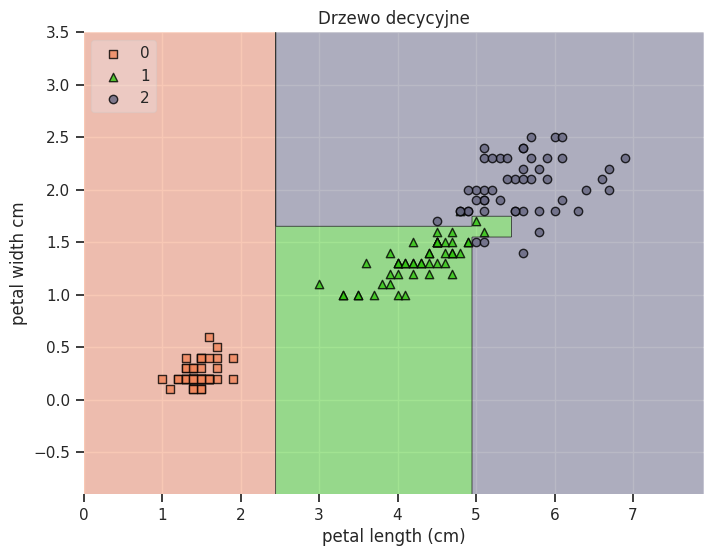

In [43]:
# Wykreslenie granicy decyzyjej
from mlxtend.plotting import plot_decision_regions
colors = '#f1865b,#31c30f,#64647f,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
acc = classifier.score(X,y)
plt.figure(figsize=(8,6))
plot_decision_regions(X,y,classifier,legend=2,colors=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width cm')
plt.title('Drzewo decycyjne')
plt.show()
# Otrzymujemy drzewo, ktore dzieli nasze zbiory na 2 najbardziej jednorodne zbiory

In [44]:
# Wyswietlenie grafu drzewa
from sklearn.tree import export_graphviz
export_graphviz(classifier,
                out_file = 'iris_tree.dot',
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

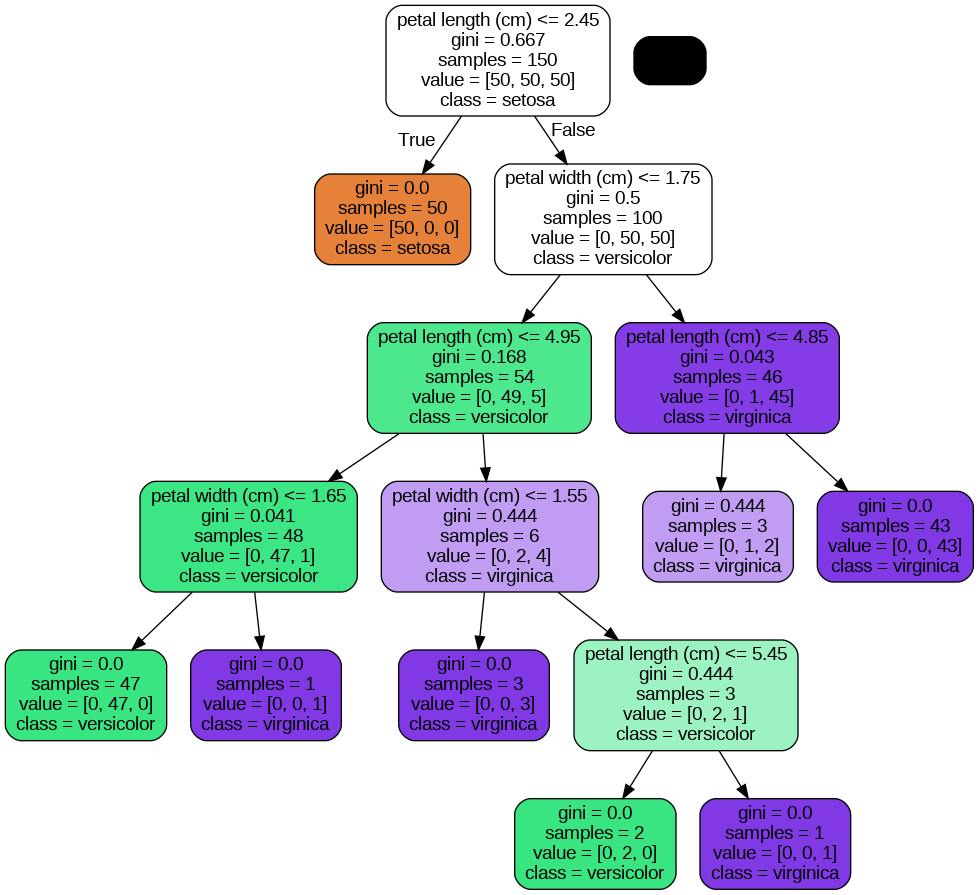

In [46]:
# Part 2
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(classifier,
                out_file = dot_data,
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png(), width = 550)
# Chcemy aby wskaznik GINI byl jak najmniejszy - mozna to osiagnac przez zwiekszanie max_depth

In [47]:
# Accuracy
acc

0.9933333333333333